**Question 1**

In [34]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount= True)

datapath = '/content/drive/MyDrive/Assignment_Data/AML/Assignment_1/'
os.path.exists(datapath)

Mounted at /content/drive


True

In [35]:
import pandas as pd

datapath = '/content/drive/MyDrive/Assignment_Data/AML/Assignment_1/'
os.path.exists(datapath)
# prepare the data
df = pd.read_csv(datapath + "fire_nrt_V1_96617.csv", thousands=',')
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [36]:
import numpy as np
import matplotlib.pyplot as plt 



**Using Matplotlib defaults**

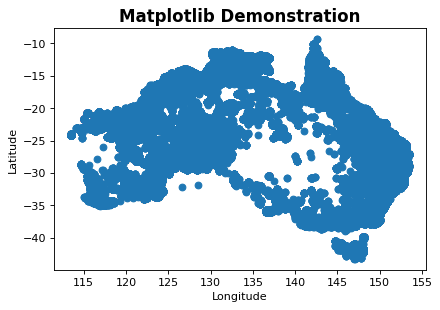

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(6,4), dpi=80)
x = df['longitude']
y = df['latitude']
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Matplotlib Demonstration', fontsize=15, fontweight='bold')
hexa = plt.scatter(x, y, marker = 'o')
plt.show()

**Adjusting alpha and marker size to compensate for overplotting.**

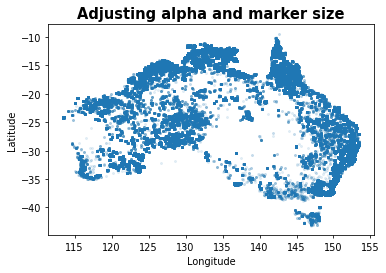

In [38]:
from matplotlib.pyplot import figure
x = df['longitude']
y = df['latitude']
figure(figsize=(6, 4), dpi=70)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Adjusting alpha and marker size', fontsize=15, fontweight='bold')
hexa = plt.scatter(x, y, alpha = 0.1, marker = 'o', s = 4)
plt.show()

**Using a hexbin plot and Subsampling the dataset.**

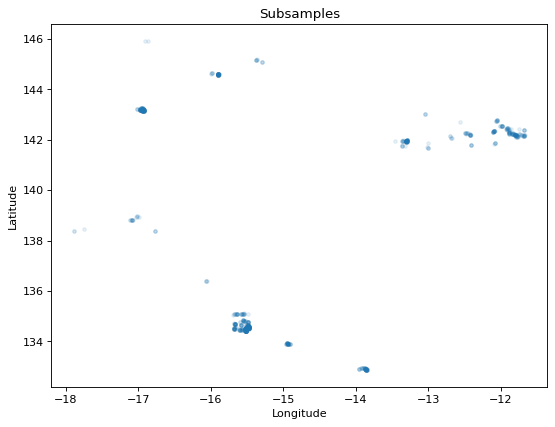

In [39]:
lat =df['latitude'][800:3600]
longi = df['longitude'][800:3600]

subsample_latitude = lat[0:800]
subsample_longitude = longi[0:800]

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
x = df['longitude']
y = df['latitude']
plt.title('Subsamples', fontsize=12)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
hexa = plt.scatter(subsample_latitude, subsample_longitude, alpha = 0.1, marker = 'o', s = 10)
plt.show()


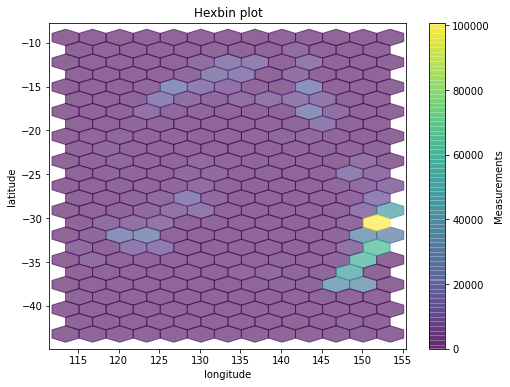

In [40]:
grid = (80,80)
from matplotlib.pyplot import figure
figure, ax = plt.subplots(figsize=(8,6))
x = df['longitude']
y = df['latitude']
plt.title('Hexbin plot', fontsize=12)
plt.xlabel("longitude")
plt.ylabel("latitude")
hexa = plt.hexbin(x, y, alpha = 0.6, gridsize = (12,12))
figure.colorbar(hexa, label="Measurements")
plt.show()

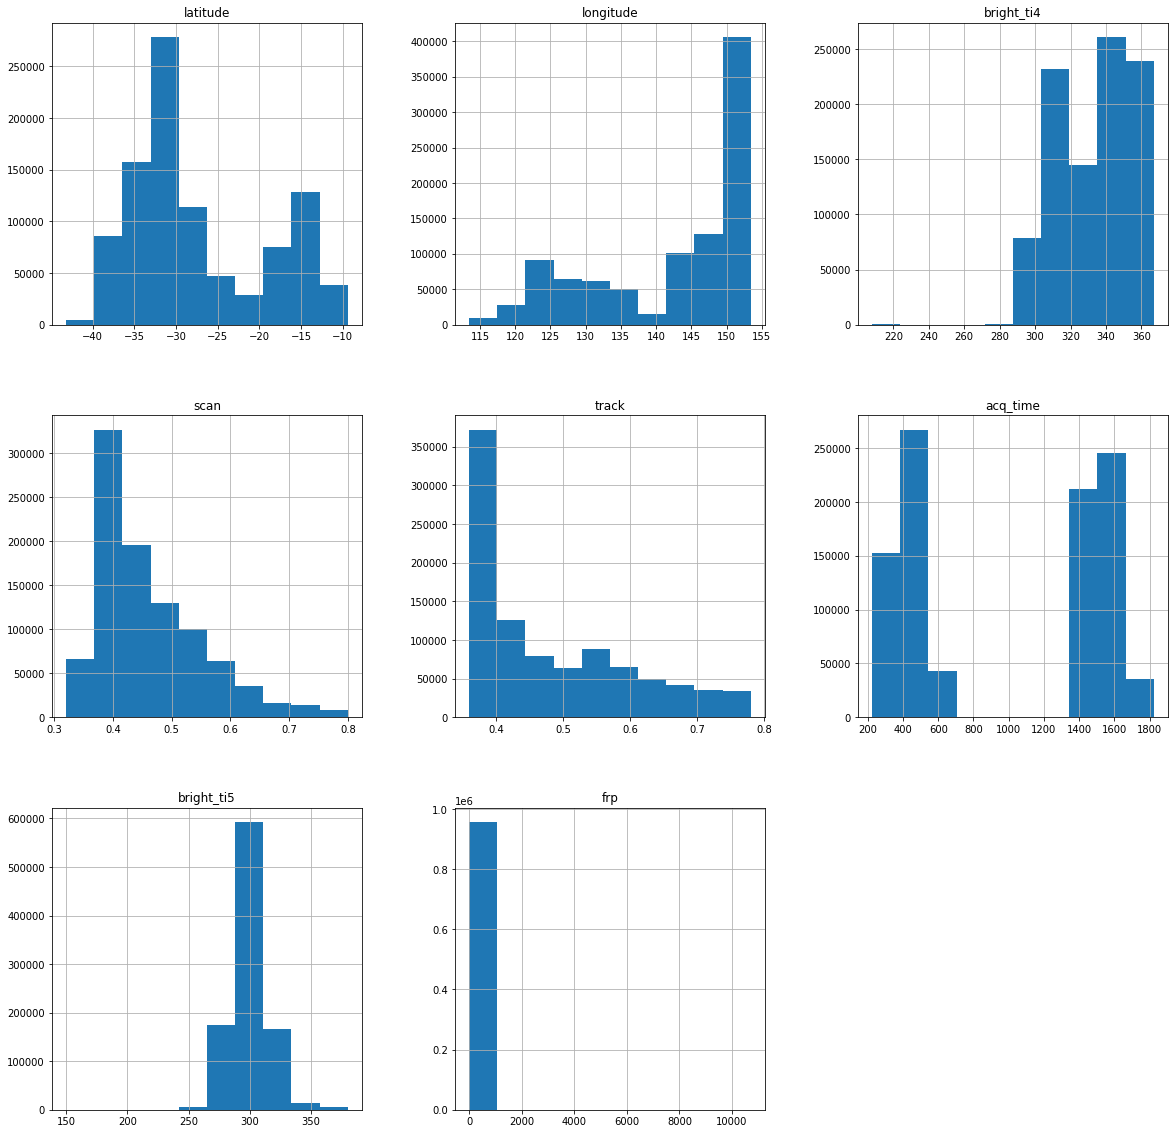

In [41]:
%matplotlib inline
df.hist(figsize = (20,20))
plt.show()

**In what areas are most of the anomalies ?**

From the graphs and the plots, we can interpret that most of the anomalies lie in the western and south - eastern region of the Australia.

**Question 2**

In [42]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [43]:
from google.colab import drive
drive.mount('/content/drive')
datapath = '/content/drive/MyDrive/Assignment_Data/AML/Assignment_1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
csv_path = os.path.join(datapath,"fire_nrt_V1_96617.csv")
fire_data = pd.read_csv(csv_path)

In [45]:
fire_data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


**Getting to know more about the data**

In [46]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956257 entries, 0 to 956256
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    956257 non-null  float64
 1   longitude   956257 non-null  float64
 2   bright_ti4  956257 non-null  float64
 3   scan        956257 non-null  float64
 4   track       956257 non-null  float64
 5   acq_date    956257 non-null  object 
 6   acq_time    956257 non-null  int64  
 7   satellite   956257 non-null  object 
 8   instrument  956257 non-null  object 
 9   confidence  956257 non-null  object 
 10  version     956257 non-null  object 
 11  bright_ti5  956257 non-null  float64
 12  frp         956257 non-null  float64
 13  daynight    956257 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 102.1+ MB


In [47]:
fire_data.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,bright_ti5,frp
count,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000
mean,-27.465569,142.191838,333.922148,0.460398,0.480464,986.334617,299.311259,15.557809
std,8.008223,10.986038,21.988456,0.089811,0.118792,555.548115,14.724600,45.584396
min,-43.212320,113.447010,208.000000,0.320000,0.360000,224.000000,150.000000,0.000000
25%,-33.133860,132.291060,312.800000,0.390000,0.380000,418.000000,289.500000,2.100000
50%,-30.489390,147.987880,336.700000,0.430000,0.440000,1400.000000,295.600000,5.200000
75%,-19.142220,150.751010,351.000000,0.510000,0.570000,1512.000000,307.600000,13.200000
max,-9.396500,153.452180,367.000000,0.800000,0.780000,1824.000000,380.000000,10717.200000


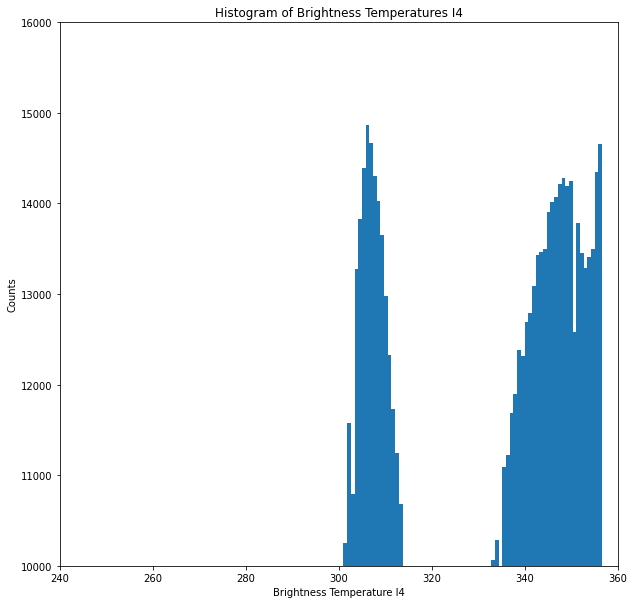

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(fire_data["bright_ti4"],bins=200)
ax.set_xlim(240,360)
ax.set_ylim(10000,16000)

ax.set_title("Histogram of Brightness Temperatures I4");
ax.set_xlabel("Brightness Temperature I4");
ax.set_ylabel("Counts");

**Based on the above histogram, we can assume that Saturated brightness are those above 330**

In [49]:
saturated_df = fire_data[fire_data['bright_ti4']>330]
unsaturated_df = fire_data[fire_data['bright_ti4']<=330]


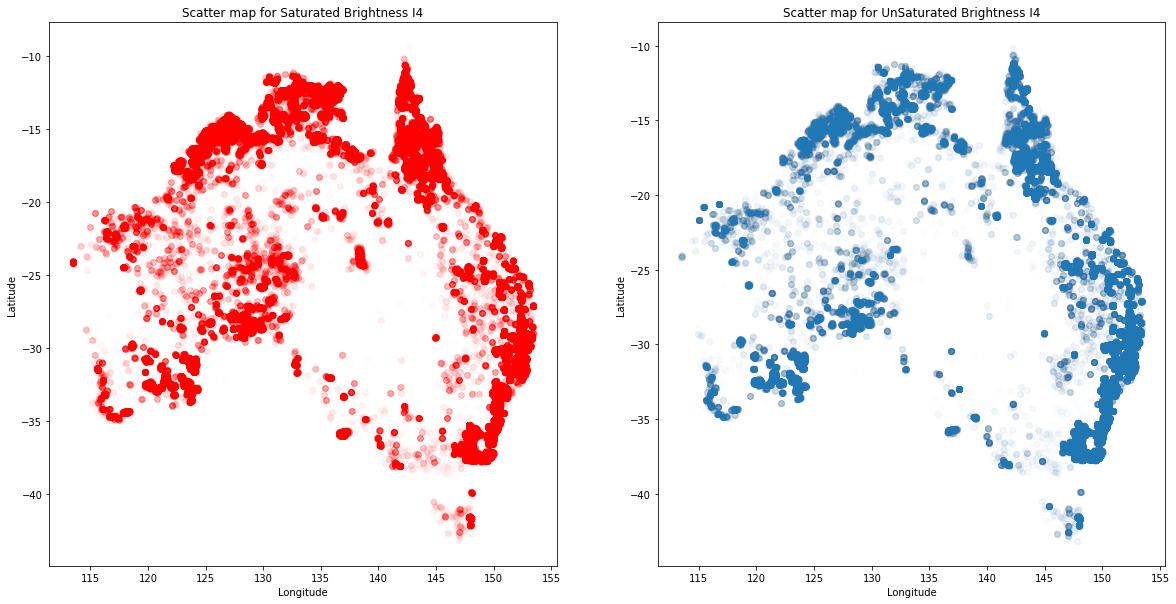

In [50]:
figure, ax = plt.subplots(1,2,figsize = (20,10))
img = ax[0].scatter(saturated_df.longitude,saturated_df.latitude,alpha=0.01,color='red')
ax[0].set_title("Scatter map for Saturated Brightness I4")

img = ax[1].scatter(unsaturated_df.longitude,unsaturated_df.latitude, alpha=0.01)
ax[1].set_title("Scatter map for UnSaturated Brightness I4")

for axis in ax.ravel():
  axis.set_xlabel('Longitude')
  axis.set_ylabel('Latitude')

plt.show()

# As we can see, for the saturated temperature, it is more widely spread in between of Australia compared to unsaturated temperature.

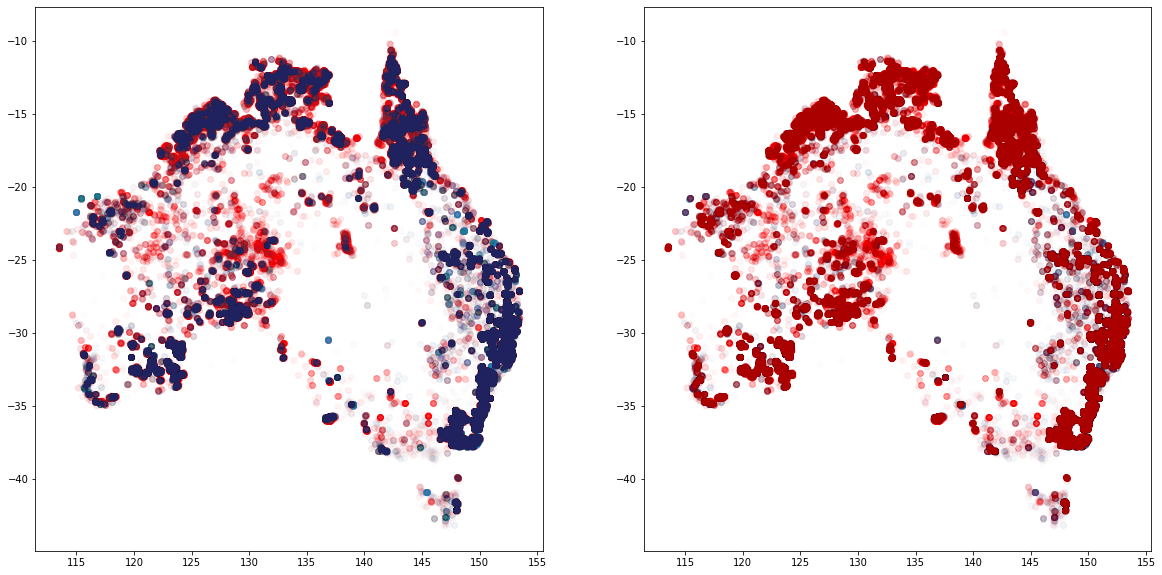

In [51]:
figure, ax = plt.subplots(1,2,figsize = (20,10))
ax[0].scatter(saturated_df.longitude,saturated_df.latitude,alpha=0.01,color='red')
ax[0].scatter(unsaturated_df.longitude,unsaturated_df.latitude, alpha=0.01)
# When we plot unsaturated data on top of saturated we can still see the saturated brightness points at some points, majorly on the middle on the australia.

ax[1].scatter(unsaturated_df.longitude,unsaturated_df.latitude, alpha=0.01)
ax[1].scatter(saturated_df.longitude,saturated_df.latitude,alpha=0.01,color='red')
# Although, when we reverse the order, we can hardly see any unsaturated brightness points, this is happening because there are 
# just so many saturated points available.

Text(0.5, 0, 'Brightness')

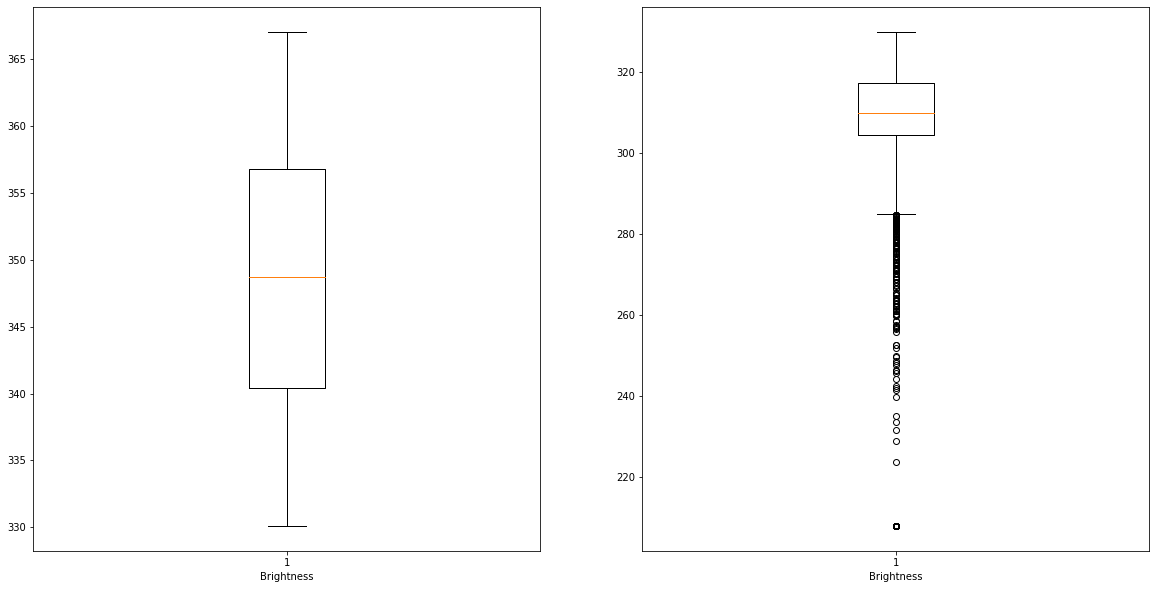

In [52]:
figure, ax = plt.subplots(1,2,figsize = (20,10))
ax[0].boxplot(saturated_df.bright_ti4)
ax[0].set_xlabel("Brightness")

ax[1].boxplot(unsaturated_df.bright_ti4)
ax[1].set_xlabel("Brightness")

# For comparing, we can use boxplot to see how many outliers do they have and what are their quartile ranges. 
# For saturated plot, we can see there are zero outliers and the spread is very uniform
# But for unsaturated plot, there seems to be many outliers and the spread does not look very uniform.

Text(0.5, 0, 'Brightness')

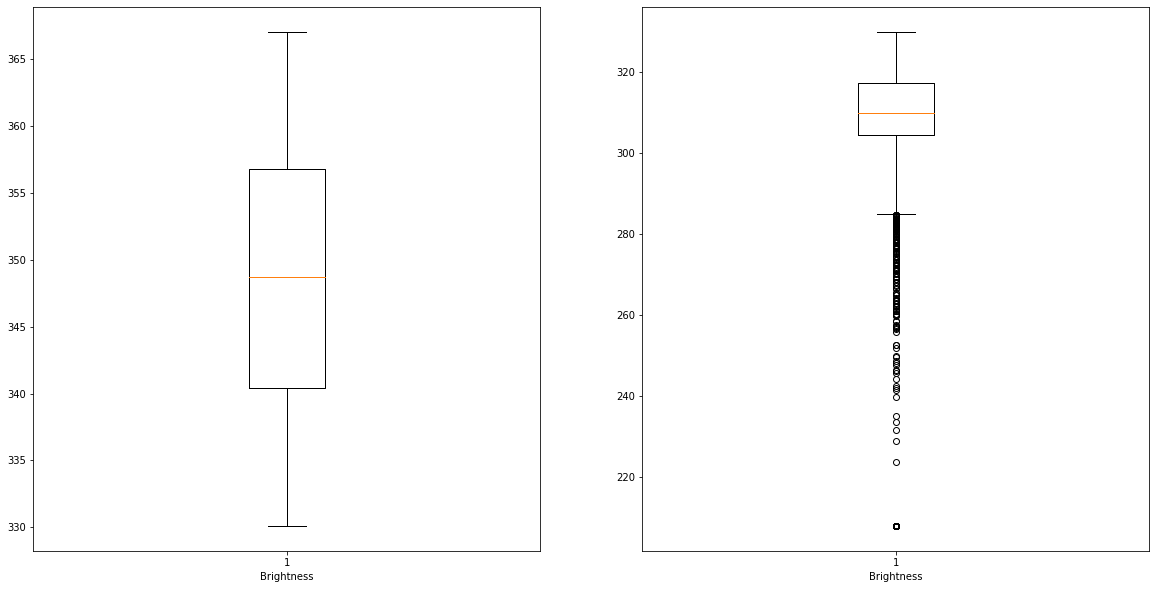

In [53]:
figure, ax = plt.subplots(1,2,figsize = (20,10))
ax[0].boxplot(saturated_df.bright_ti4)
ax[0].set_xlabel("Brightness")

ax[1].boxplot(unsaturated_df.bright_ti4)
ax[1].set_xlabel("Brightness")

# For comparing, we can use boxplot to see how many outliers do they have and what are their quartile ranges. 
# For saturated plot, we can see there are zero outliers and the spread is very uniform
# But for unsaturated plot, there seems to be many outliers and the spread does not look very uniform.

**Question 3**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(datapath + "data.csv", thousands=',').dropna()


**Removing the date field**

In [55]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [56]:
data.drop("date",axis=1, inplace = True)
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**1a.Determine which features are continuous vs. categorical. **

In [57]:
data.info()


    
numeric_data = data.select_dtypes(['float','int']).columns
categorical_data = data.select_dtypes('object').columns


print("Continuous data: " , numeric_data)
print("Categorical data : ",categorical_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 646

# Categoical data
street        
city          
statezip       
country

# Continuous data

price
bedrooms
bathrooms

sqft_living

sqft_lot

floors

waterfront

view

condition

sqft_above

sqft_basement

yr_built

yr_renovated
    

**1.b.Drop rows without a valid sales price**

In [58]:

#visualising and removing the values having price as 0
data["price"].value_counts()
data.drop(data[data['price'] <= 0].index, inplace = True)



**Visualize the univariate distribution of each continuous variable, and the distribution of the target.**

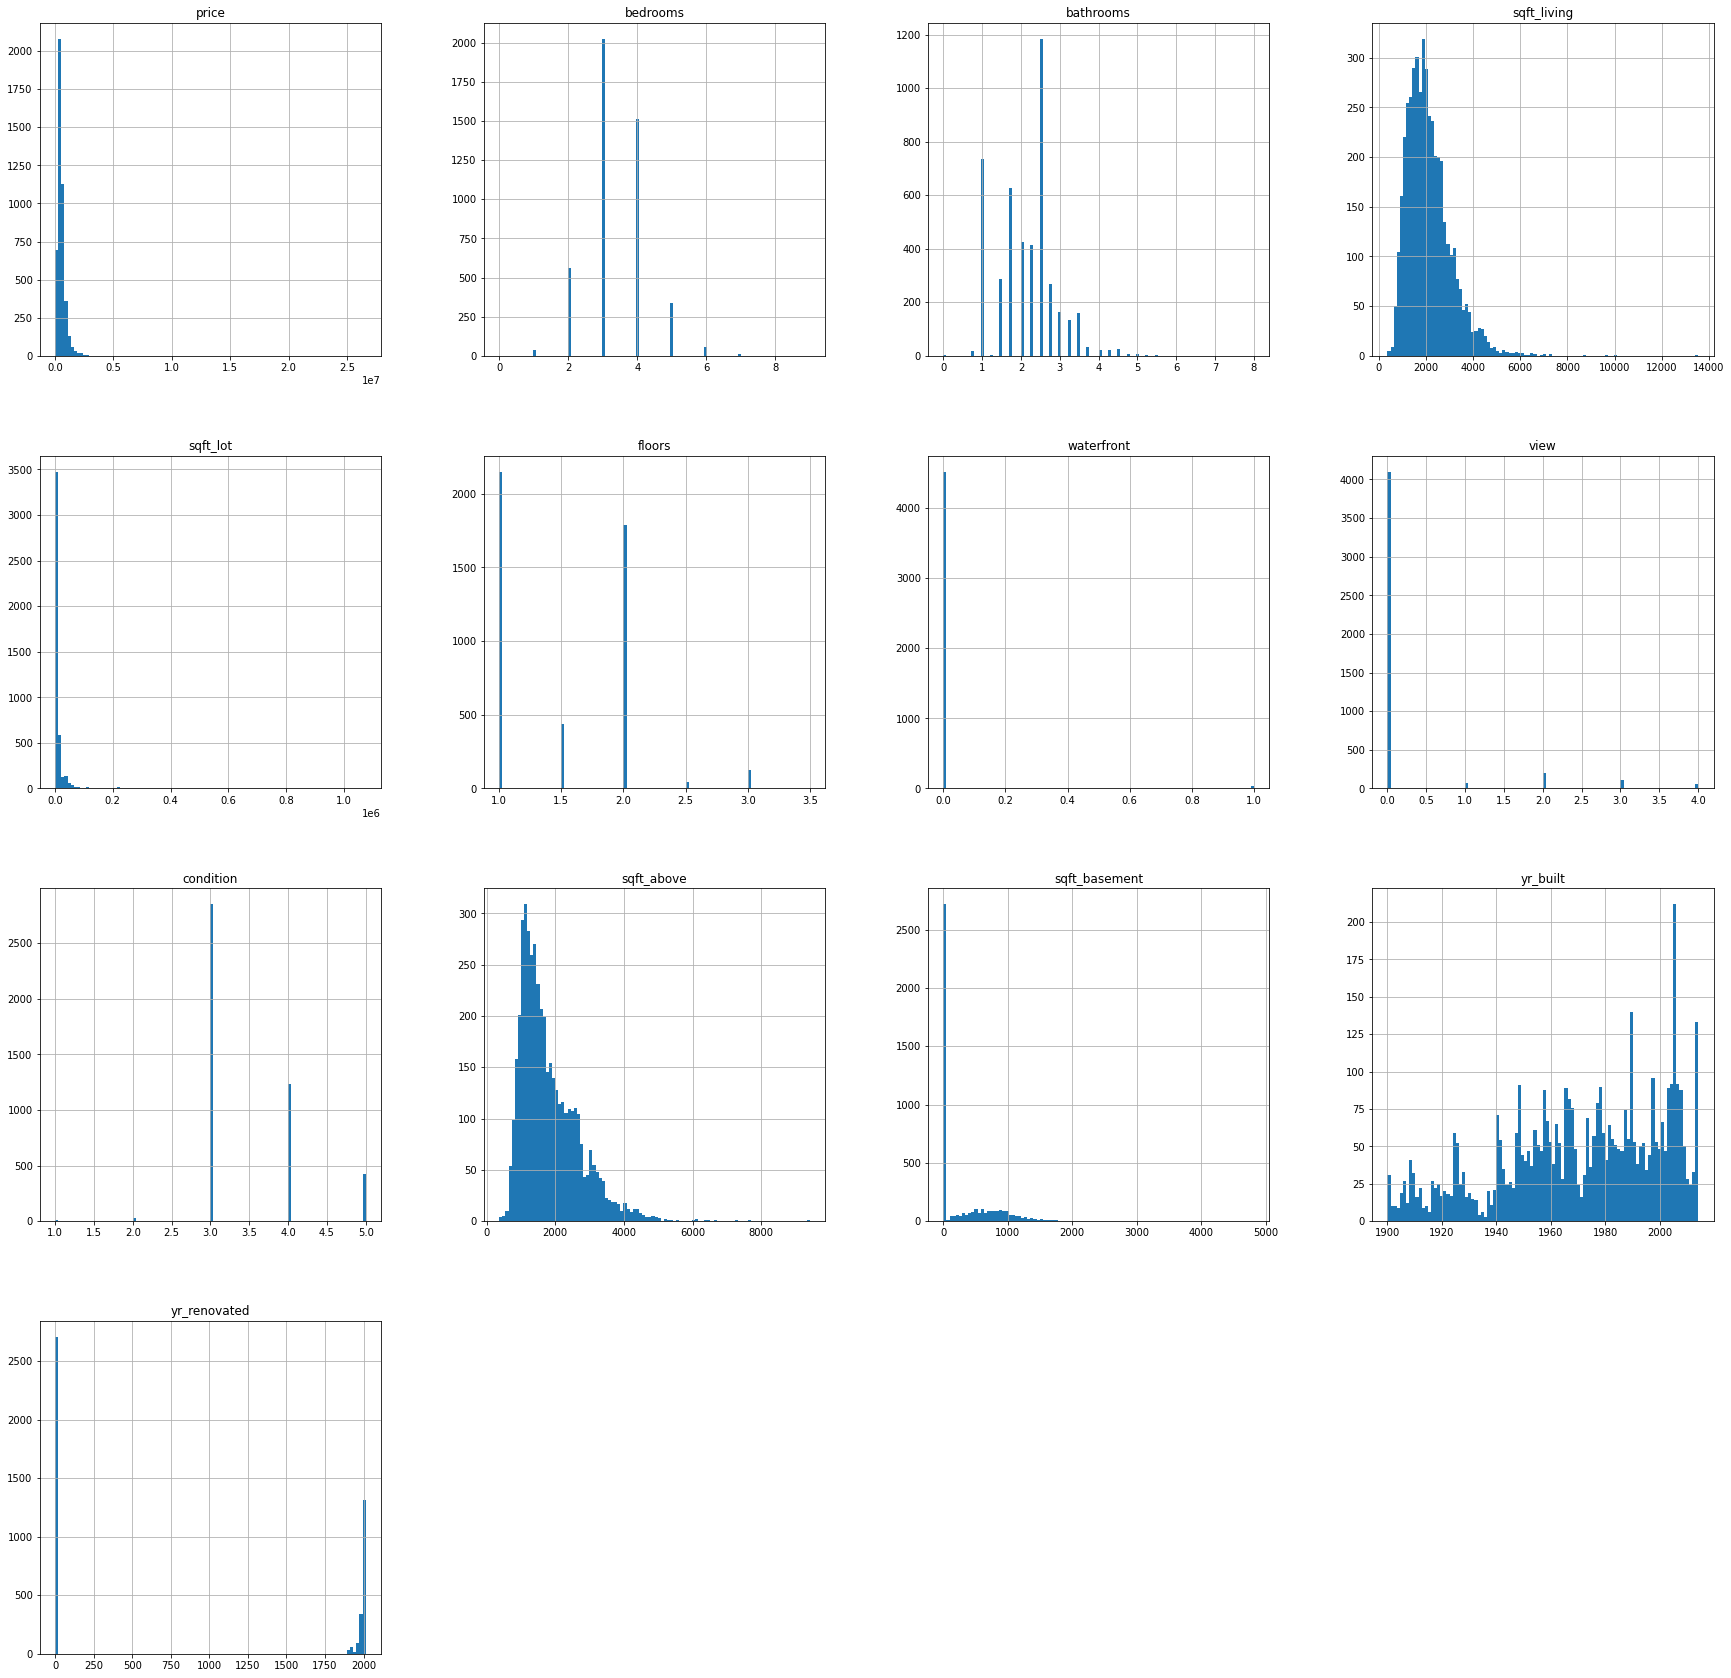

In [59]:
data.hist(bins=100, figsize=(30,30))
plt.show()



**Visualize the dependency of the target on each continuous feature (2d scatter plot).**

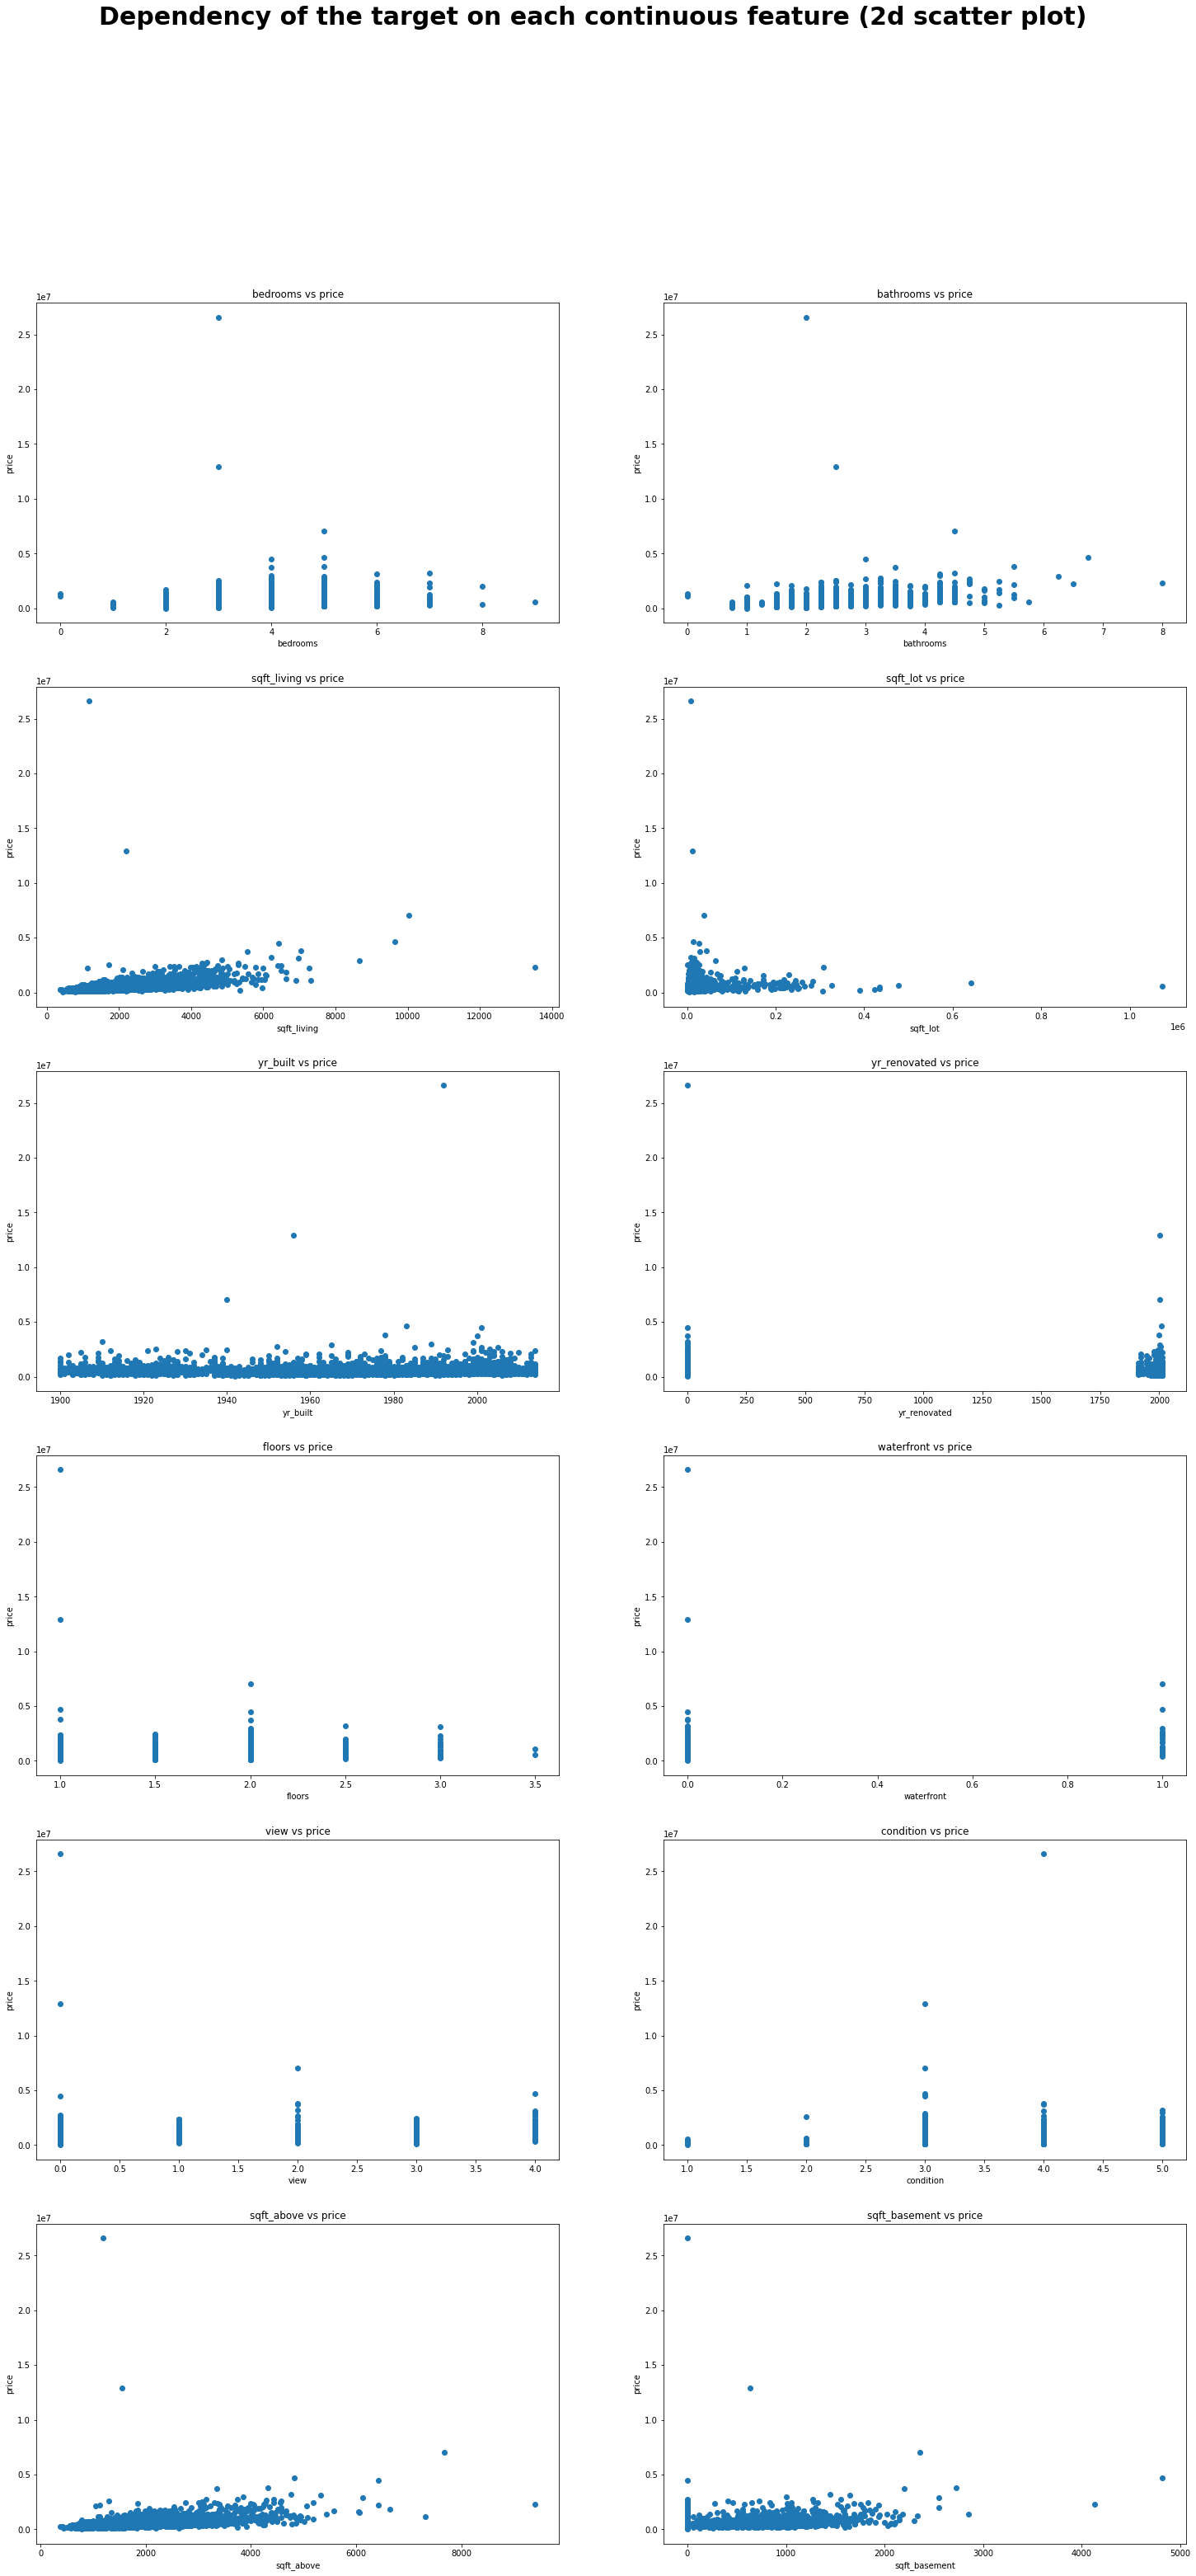

In [60]:


fig, ax = plt.subplots(6,2, figsize=(25,50))
fig.suptitle("Dependency of the target on each continuous feature (2d scatter plot)",fontweight="bold", size=30)
plt.ylabel("price")

#bedrooms vs price
ax[0,0].scatter(data.bedrooms,data.price)
ax[0,0].set(xlabel='bedrooms', ylabel='price')
ax[0,0].set_title("bedrooms vs price")

#bathrooms vs price
ax[0,1].scatter(data.bathrooms,data.price)
ax[0,1].set(xlabel='bathrooms', ylabel='price')
ax[0,1].set_title("bathrooms vs price")

#sqft_living vs price
ax[1,0].scatter(data.sqft_living,data.price)
ax[1,0].set(xlabel='sqft_living', ylabel='price')
ax[1,0].set_title("sqft_living vs price")

#sqft_lot vs price
ax[1,1].scatter(data.sqft_lot,data.price)
ax[1,1].set(xlabel='sqft_lot', ylabel='price')
ax[1,1].set_title("sqft_lot vs price")

#yr_built vs price
ax[2,0].scatter(data.yr_built,data.price)
ax[2,0].set(xlabel='yr_built', ylabel='price')
ax[2,0].set_title("yr_built vs price")

#yr_renovated vs price
ax[2,1].scatter(data.yr_renovated,data.price)
ax[2,1].set(xlabel='yr_renovated', ylabel='price')
ax[2,1].set_title("yr_renovated vs price")

#floors vs price
ax[3,0].scatter(data.floors,data.price)
ax[3,0].set(xlabel='floors', ylabel='price')
ax[3,0].set_title("floors vs price")

#waterfront vs price
ax[3,1].scatter(data.waterfront,data.price)
ax[3,1].set(xlabel='waterfront', ylabel='price')
ax[3,1].set_title("waterfront vs price")

#view vs price
ax[4,0].scatter(data.view,data.price)
ax[4,0].set(xlabel='view', ylabel='price')
ax[4,0].set_title("view vs price")

#condition vs price
ax[4,1].scatter(data.condition,data.price)
ax[4,1].set(xlabel='condition', ylabel='price')
ax[4,1].set_title("condition vs price")

#sqft_above vs price
ax[5,0].scatter(data.sqft_above,data.price)
ax[5,0].set(xlabel='sqft_above', ylabel='price')
ax[5,0].set_title("sqft_above vs price")

#sqft_basement vs price
ax[5,1].scatter(data.sqft_basement,data.price)
ax[5,1].set(xlabel='sqft_basement', ylabel='price')
ax[5,1].set_title("sqft_basement vs price")



plt.show()

In [61]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.445494
sqft_above       0.380661
bathrooms        0.341126
view             0.242587
sqft_basement    0.217782
bedrooms         0.210228
floors           0.152758
waterfront       0.150083
sqft_lot         0.051347
condition        0.038892
yr_built         0.021757
yr_renovated    -0.029034
Name: price, dtype: float64

From the above correlation scores, we can remove the bottom 4 features, in order to get better accuracy for our model.

**In the below step, we separate the X and Y inputs in the data set**

In [62]:

# data_x = data.drop(["price","yr_renovated","yr_built","condition","sqft_lot"],axis=1)

data_x = data.drop(["price"],axis=1)



data_y = data["price"].to_frame()


In [63]:

categorical_features = ['country','city','street','statezip']


# numeric_features = ['sqft_living','sqft_basement','bathrooms','view','bedrooms','sqft_above',"waterfront","floors"]

numeric_features = ['sqft_living','sqft_basement','bathrooms','view','bedrooms','sqft_above',"waterfront","floors","yr_renovated","yr_built","condition","sqft_lot"]

In [65]:
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


#numeric transformer with the standard scaler 
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

#numeric transformer without the standard scaler 
numeric_transformer_unscaled = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])


categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown="ignore"))
])


full_pipeline = ColumnTransformer([
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

full_pipeline_unscaled = ColumnTransformer([
        ("num", numeric_transformer_unscaled, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

data_prepared_x = full_pipeline.fit_transform(data_x)
data_prepared_y = data_y
data_prepared_x_unscaled = full_pipeline_unscaled.fit_transform(data_x)
data_prepared_y_unscaled = data_y

**Split the data in training and testing set.**

In [66]:
from sklearn.model_selection import train_test_split
train_data_x,test_data_x,train_data_y,test_data_y = train_test_split(data_prepared_x, data_prepared_y, test_size=0.2, random_state=30)

#Data without standard scaling
train_data_x_unscaled,test_data_x_unscaled,train_data_y_unscaled,test_data_y_unscaled = train_test_split(data_prepared_x_unscaled, data_prepared_y_unscaled, test_size=0.2, random_state=30)



**Evaluate machine learning models**

**Linear regression**

In [67]:
#  Evaluate Linear Regression (OLS)
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data_x, train_data_y)


print("Model score: " , lin_reg.score(test_data_x,test_data_y))
cross_val_scores_lin = cross_val_score(lin_reg, test_data_x, test_data_y, cv=7)
print("Cross validation score using Linear regression: ", round(cross_val_scores_lin.mean(),2))

Model score:  0.44955072859881495
Cross validation score using Linear regression:  0.73


**Ridge**

In [68]:
# Ridge

from sklearn.linear_model import Ridge


ridge = Ridge()
ridge.fit(train_data_x, train_data_y)

print("Model score: " , ridge.score(test_data_x,test_data_y))
cross_val_scores_ridge = cross_val_score(ridge, test_data_x, test_data_y, cv=7)
print("Cross validation score using Ridge model :", round(cross_val_scores_ridge.mean(),2))

Model score:  0.6910950772733546
Cross validation score using Ridge model : 0.73


**Lasso**

In [69]:
#Lasso
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.01)
lasso.fit(train_data_x, train_data_y) 

print("Model score: " , lasso.score(test_data_x,test_data_y))

cross_val_scores_lasso = cross_val_score(lasso, test_data_x, test_data_y, cv=7)
print("Cross validation score using Lasso model :", round(cross_val_scores_lasso.mean(),2))

Model score:  0.6565238396907094
Cross validation score using Lasso model : 0.66


**Elastic net**

In [70]:
#Elasticnet
from sklearn.linear_model import ElasticNet



elnet = ElasticNet(alpha=0.01)
elnet.fit(train_data_x, train_data_y) 

print("Model score: " , elnet.score(test_data_x,test_data_y))
cross_val_scores_elnet = cross_val_score(elnet, test_data_x, test_data_y, cv=7)
print("Cross validation score using elnet model :", round(cross_val_scores_elnet.mean(),2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385796975383914.1, tolerance: 132218076437.71788
  positive,


Model score:  0.7092937880120229


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8410549519969.797, tolerance: 10977851513.4325
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7898833798446.926, tolerance: 10937023214.94627
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6218305622698.086, tolerance: 10922112686.718828
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750717773699

Cross validation score using elnet model : 0.73


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6741268068121.327, tolerance: 10298112482.09198
  positive,


From the above evaluations, we can conclude that Ridge model works best for our data followed by Elasticnet

**Does scaling the data with StandardScaler help?**

We can verify this by running the models and comparing the accuracy with the unscaled numeric data (numeric data where we did not apply the standard scaling)

**Linear Regression**

In [71]:

lin_reg1 = LinearRegression()
lin_reg1.fit(train_data_x_unscaled, train_data_y_unscaled)


print("Model score: " , lin_reg1.score(test_data_x_unscaled,test_data_y_unscaled))
cross_val_scores_lin_unscaled = cross_val_score(lin_reg1, test_data_x_unscaled, test_data_y_unscaled, cv=7)
print("Cross validation score using Linear regression: ", round(cross_val_scores_lin_unscaled.mean(),2))

Model score:  0.6205116874300547
Cross validation score using Linear regression:  0.73


**Ridge**

In [72]:

from sklearn.linear_model import Ridge


ridge = Ridge()
ridge.fit(train_data_x_unscaled,train_data_y_unscaled)

print("Model score: " , ridge.score(test_data_x_unscaled,test_data_y_unscaled))
cross_val_scores_ridge = cross_val_score(ridge, test_data_x_unscaled,test_data_y_unscaled, cv=7)
print("Cross validation score using Ridge model :", round(cross_val_scores_ridge.mean(),2))

Model score:  0.6937054401571754
Cross validation score using Ridge model : 0.73


**Lasso**

In [73]:
#Lasso
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.01)
lasso.fit(train_data_x_unscaled,train_data_y_unscaled) 

print("Model score: " , lasso.score(test_data_x_unscaled,test_data_y_unscaled))

cross_val_scores_lasso = cross_val_score(lasso, test_data_x_unscaled,test_data_y_unscaled, cv=7)
print("Cross validation score using Lasso model :", round(cross_val_scores_lasso.mean(),2))

Model score:  0.6565254978905535
Cross validation score using Lasso model : 0.66


In [74]:
#Elasticnet
from sklearn.linear_model import ElasticNet



elnet = ElasticNet(alpha=0.01)
elnet.fit(train_data_x_unscaled,train_data_y_unscaled) 

print("Model score: " , elnet.score(test_data_x_unscaled,test_data_y_unscaled))
cross_val_scores_elnet = cross_val_score(elnet, test_data_x_unscaled,test_data_y_unscaled, cv=7)
print("Cross validation score using elnet model :", round(cross_val_scores_elnet.mean(),2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457894103958397.94, tolerance: 132218076437.71788
  positive,


Model score:  0.7193072264260674


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11098131853080.613, tolerance: 10977851513.4325
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11084145663156.701, tolerance: 10937023214.94627
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11467316075419.617, tolerance: 10922112686.718828
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103391046

Cross validation score using elnet model : 0.72


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10773712520662.613, tolerance: 10298112482.09198
  positive,


**From the above inference, standard scaling helps with a better model score.**

**Question 4**

In [75]:
from sklearn import preprocessing
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [76]:
df = fetch_openml('credit-g', version=1, as_frame=True)['data']
df.head(3)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes


In [77]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [79]:
categorical = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']
continuous = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']

In [80]:
X, y = fetch_openml('credit-g', version=1, as_frame=True, return_X_y=True)

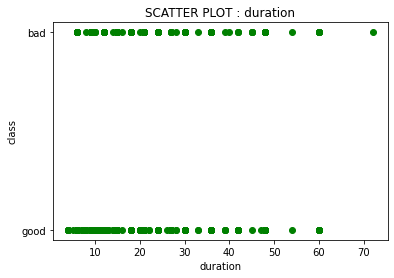

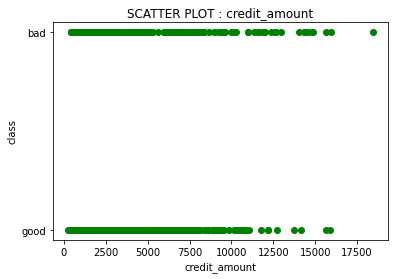

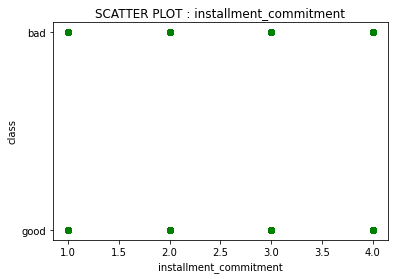

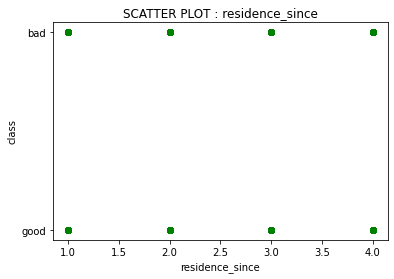

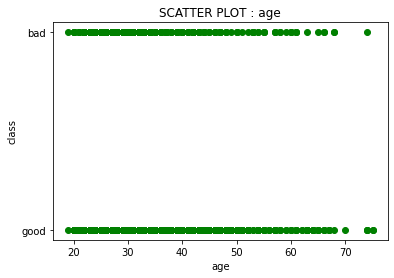

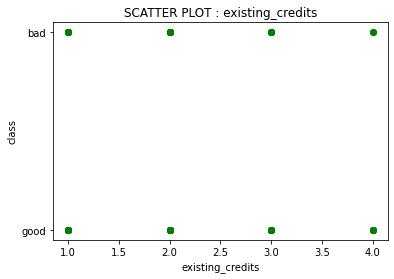

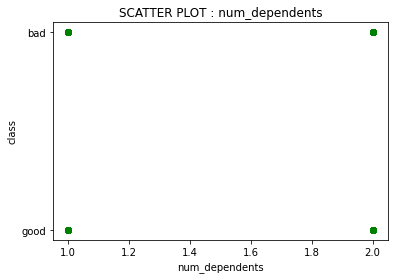

In [81]:
for i in continuous:
    plt.scatter(X[i],y,color='green')
    plt.xlabel(i)
    plt.ylabel("class")
    plt.title("SCATTER PLOT : " + i)
    plt.show()

In [83]:
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
 
numeric_features = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
 

model.fit(X_train, y_train)
 

print(f'Model score: {model.score(X_test, y_test)}')

Model score: 0.7733333333333333


In [84]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', knn)])
 
# Split into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
 
# Train the model on the training dataset
model1.fit(X_train, y_train)
 
# evaluate the model by comparing results to the test dataset.
print(f'Model score: {model1.score(X_test, y_test)}')

Model score: 0.73


In [85]:
from sklearn import svm


model1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svm.SVC(kernel='linear'))])
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
 

model1.fit(X_train, y_train)
 

print(f'Model score: {model.score(X_test, y_test)}')

Model score: 0.7733333333333333
